In [1]:
import numpy as np
import pandas as pd

In [2]:
match=pd.read_csv('matches.csv')
match.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [3]:
match.shape

(636, 18)

In [4]:
delivery=pd.read_csv('deliveries.csv')
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [5]:
#grouping data on batsman
runs=delivery.groupby('batsman')


In [6]:
#gives rows of him(batting)
runs.get_group('DA Warner')

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150283,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,12,6,DA Warner,Yuvraj Singh,CJ Jordan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
150284,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,13,1,DA Warner,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
150288,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,13,5,DA Warner,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
150291,636,1,Sunrisers Hyderabad,Royal Challengers Bangalore,14,2,DA Warner,Yuvraj Singh,S Aravind,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [8]:
#no of balls played
runs.get_group('DA Warner').shape

(2902, 21)

In [11]:
#sum of runs of all the batsman
runs['batsman_runs'].sum()

batsman
A Ashish Reddy     280
A Chandila           4
A Chopra            53
A Choudhary         25
A Flintoff          62
                  ... 
YV Takawale        192
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2591
Z Khan             117
Name: batsman_runs, Length: 461, dtype: int64

In [12]:
#gives top 10 highest runcount of the batsman
runs['batsman_runs'].sum().sort_values(ascending=False).head(10)

batsman
SK Raina          4548
V Kohli           4423
RG Sharma         4207
G Gambhir         4132
DA Warner         4014
RV Uthappa        3778
CH Gayle          3651
S Dhawan          3561
MS Dhoni          3560
AB de Villiers    3486
Name: batsman_runs, dtype: int64

In [13]:
#how many 6's in this 10 years 
mask=delivery['batsman_runs']==6
new_delivery=delivery[mask]
new_delivery.shape[0]

6523

In [18]:
#gives top 5 batsman with their runscore
new_delivery.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(5)

batsman
CH Gayle     266
SK Raina     174
RG Sharma    173
V Kohli      160
DA Warner    160
Name: batsman_runs, dtype: int64

In [22]:
#top 3 bowling teams in which DA Warner runscore is more
x=delivery[delivery['batsman']=='DA Warner']
x.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False).head(3)

bowling_team
Kolkata Knight Riders          677
Kings XI Punjab                668
Royal Challengers Bangalore    569
Name: batsman_runs, dtype: int64

In [25]:
#lets write the above code in function
def run_scored(batsman_name):
    x=delivery[delivery['batsman']=='DA Warner']
    return x.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False).head(3)
run_scored('DA Warner')

bowling_team
Kolkata Knight Riders          677
Kings XI Punjab                668
Royal Challengers Bangalore    569
Name: batsman_runs, dtype: int64

In [27]:
#isin () function
# lets find the most destructive death over batsman in the history of ipl

In [29]:
death_over=delivery[delivery['over']>15]

In [41]:
death_over.groupby('batsman')['batsman_runs'].count()>200

batsman
A Ashish Reddy    False
A Chandila        False
A Chopra          False
A Choudhary       False
A Flintoff        False
                  ...  
YS Chahal         False
YV Takawale       False
Yashpal Singh     False
Yuvraj Singh       True
Z Khan            False
Name: batsman_runs, Length: 416, dtype: bool

In [43]:
all_batsman=death_over.groupby('batsman')['batsman_runs'].count()
x=all_batsman>200

In [45]:
all_batsman[x]

batsman
A Mishra             225
AB de Villiers       570
AD Mathews           289
AM Rahane            268
AR Patel             229
AT Rayudu            425
BJ Hodge             385
DA Miller            360
DA Warner            228
DJ Bravo             409
DJ Hussey            234
DPMD Jayawardene     246
Harbhajan Singh      418
IK Pathan            465
JA Morkel            425
JH Kallis            231
JP Duminy            518
JP Faulkner          294
KA Pollard           838
KD Karthik           463
KM Jadhav            338
LRPL Taylor          204
MK Pandey            224
MK Tiwary            423
MS Dhoni            1224
NV Ojha              304
P Kumar              268
PP Chawla            311
R Vinay Kumar        235
RA Jadeja            576
RG Sharma            748
RV Uthappa           275
S Badrinath          283
S Dhawan             243
SK Raina             458
SPD Smith            316
SS Tiwary            300
STR Binny            218
V Kohli              546
WP Saha          

In [47]:
all_batsman[x].index

Index(['A Mishra', 'AB de Villiers', 'AD Mathews', 'AM Rahane', 'AR Patel',
       'AT Rayudu', 'BJ Hodge', 'DA Miller', 'DA Warner', 'DJ Bravo',
       'DJ Hussey', 'DPMD Jayawardene', 'Harbhajan Singh', 'IK Pathan',
       'JA Morkel', 'JH Kallis', 'JP Duminy', 'JP Faulkner', 'KA Pollard',
       'KD Karthik', 'KM Jadhav', 'LRPL Taylor', 'MK Pandey', 'MK Tiwary',
       'MS Dhoni', 'NV Ojha', 'P Kumar', 'PP Chawla', 'R Vinay Kumar',
       'RA Jadeja', 'RG Sharma', 'RV Uthappa', 'S Badrinath', 'S Dhawan',
       'SK Raina', 'SPD Smith', 'SS Tiwary', 'STR Binny', 'V Kohli', 'WP Saha',
       'Y Venugopal Rao', 'YK Pathan', 'Yuvraj Singh'],
      dtype='object', name='batsman')

In [49]:
all_batsman[x].values

array([ 225,  570,  289,  268,  229,  425,  385,  360,  228,  409,  234,
        246,  418,  465,  425,  231,  518,  294,  838,  463,  338,  204,
        224,  423, 1224,  304,  268,  311,  235,  576,  748,  275,  283,
        243,  458,  316,  300,  218,  546,  295,  260,  584,  516],
      dtype=int64)

In [53]:
batsman_list=all_batsman[x].index.tolist()
batsman_list

['A Mishra',
 'AB de Villiers',
 'AD Mathews',
 'AM Rahane',
 'AR Patel',
 'AT Rayudu',
 'BJ Hodge',
 'DA Miller',
 'DA Warner',
 'DJ Bravo',
 'DJ Hussey',
 'DPMD Jayawardene',
 'Harbhajan Singh',
 'IK Pathan',
 'JA Morkel',
 'JH Kallis',
 'JP Duminy',
 'JP Faulkner',
 'KA Pollard',
 'KD Karthik',
 'KM Jadhav',
 'LRPL Taylor',
 'MK Pandey',
 'MK Tiwary',
 'MS Dhoni',
 'NV Ojha',
 'P Kumar',
 'PP Chawla',
 'R Vinay Kumar',
 'RA Jadeja',
 'RG Sharma',
 'RV Uthappa',
 'S Badrinath',
 'S Dhawan',
 'SK Raina',
 'SPD Smith',
 'SS Tiwary',
 'STR Binny',
 'V Kohli',
 'WP Saha',
 'Y Venugopal Rao',
 'YK Pathan',
 'Yuvraj Singh']

In [66]:
final=delivery[delivery['batsman'].isin(batsman_list)]
final

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150442,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,18,1,STR Binny,Sachin Baby,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
150443,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,18,2,STR Binny,Sachin Baby,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
150445,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,18,4,STR Binny,Sachin Baby,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
150446,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,18,5,STR Binny,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN


In [90]:
runs=final.groupby('batsman')['batsman_runs'].sum()
runs

batsman
A Mishra             340
AB de Villiers      3486
AD Mathews           724
AM Rahane           3057
AR Patel             606
AT Rayudu           2416
BJ Hodge            1400
DA Miller           1563
DA Warner           4014
DJ Bravo            1262
DJ Hussey           1322
DPMD Jayawardene    1808
Harbhajan Singh      799
IK Pathan           1150
JA Morkel            975
JH Kallis           2427
JP Duminy           1993
JP Faulkner          527
KA Pollard          2354
KD Karthik          2903
KM Jadhav            893
LRPL Taylor         1017
MK Pandey           2223
MK Tiwary           1648
MS Dhoni            3560
NV Ojha             1553
P Kumar              340
PP Chawla            515
R Vinay Kumar        304
RA Jadeja           1732
RG Sharma           4207
RV Uthappa          3778
S Badrinath         1441
S Dhawan            3561
SK Raina            4548
SPD Smith           1713
SS Tiwary           1276
STR Binny            766
V Kohli             4423
WP Saha          

In [108]:
balls=final.groupby('batsman')['batsman_runs'].count()
balls

batsman
A Mishra             382
AB de Villiers      2402
AD Mathews           599
AM Rahane           2602
AR Patel             494
AT Rayudu           1964
BJ Hodge            1153
DA Miller           1135
DA Warner           2902
DJ Bravo            1032
DJ Hussey           1101
DPMD Jayawardene    1522
Harbhajan Singh      591
IK Pathan            985
JA Morkel            712
JH Kallis           2291
JP Duminy           1634
JP Faulkner          406
KA Pollard          1674
KD Karthik          2360
KM Jadhav            684
LRPL Taylor          847
MK Pandey           1901
MK Tiwary           1444
MS Dhoni            2680
NV Ojha             1356
P Kumar              323
PP Chawla            467
R Vinay Kumar        285
RA Jadeja           1458
RG Sharma           3274
RV Uthappa          2960
S Badrinath         1245
S Dhawan            3005
SK Raina            3369
SPD Smith           1333
SS Tiwary           1111
STR Binny            619
V Kohli             3494
WP Saha          

In [112]:
#this will give you the strike rate
strike_rate=(runs/balls)*100
strike_rate

batsman
A Mishra             89.005236
AB de Villiers      145.129059
AD Mathews          120.868114
AM Rahane           117.486549
AR Patel            122.672065
AT Rayudu           123.014257
BJ Hodge            121.422376
DA Miller           137.709251
DA Warner           138.318401
DJ Bravo            122.286822
DJ Hussey           120.072661
DPMD Jayawardene    118.791064
Harbhajan Singh     135.194585
IK Pathan           116.751269
JA Morkel           136.938202
JH Kallis           105.936272
JP Duminy           121.970624
JP Faulkner         129.802956
KA Pollard          140.621266
KD Karthik          123.008475
KM Jadhav           130.555556
LRPL Taylor         120.070838
MK Pandey           116.938453
MK Tiwary           114.127424
MS Dhoni            132.835821
NV Ojha             114.528024
P Kumar             105.263158
PP Chawla           110.278373
R Vinay Kumar       106.666667
RA Jadeja           118.792867
RG Sharma           128.497251
RV Uthappa          127.635135


In [117]:
#merge
new=delivery.merge(match,left_on='match_id',right_on='id')
new

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [119]:
new.shape

(150460, 39)

In [121]:
new.groupby('batsman')['batsman_runs'].sum()

batsman
A Ashish Reddy     280
A Chandila           4
A Chopra            53
A Choudhary         25
A Flintoff          62
                  ... 
YV Takawale        192
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2591
Z Khan             117
Name: batsman_runs, Length: 461, dtype: int64

In [125]:
#it groups by season ,with batsmans and batsmansruns
new.groupby(['season','batsman_runs'])['batsman_runs'].sum()

season  batsman_runs
2008    0                  0
        1               4654
        2               1458
        3                117
        4               6812
                        ... 
2017    2               1726
        3                108
        4               6448
        5                 15
        6               4236
Name: batsman_runs, Length: 70, dtype: int64

In [127]:
type(new.groupby(['season','batsman_runs'])['batsman_runs'].sum())

pandas.core.series.Series

In [131]:
#multiindexseries
new.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
# it provides a new dataframe with season,batsman,batman_runs

,season,batsman,batsman_runs
0,2008,A Chopra,42
1,2008,A Kumble,13
2,2008,A Mishra,37
3,2008,A Mukund,0
4,2008,A Nehra,3
...,...,...,...
1526,2017,Washington Sundar,9
1527,2017,YK Pathan,143
1528,2017,YS Chahal,13
1529,2017,Yuvraj Singh,252


In [135]:
# highest batsmanruns and player name in every season
new.groupby(['season','batsman'])['batsman_runs'].sum().sort_values(ascending=False).reset_index().drop_duplicates(subset='season',keep='first').sort_values('season')[['season','batsman']]

,season,batsman
10,2008,SE Marsh
14,2009,ML Hayden
9,2010,SR Tendulkar
11,2011,CH Gayle
3,2012,CH Gayle
2,2013,MEK Hussey
6,2014,RV Uthappa
17,2015,DA Warner
0,2016,V Kohli
7,2017,DA Warner


In [139]:
#pivot table
#pivot tables are great ways to summarize, analyse, explore and present summary data

In [149]:
mask=delivery['batsman_runs']==6
six=delivery[mask]
six.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
47,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,8,4,MC Henriques,S Dhawan,TM Head,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
75,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,13,2,Yuvraj Singh,MC Henriques,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
89,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,3,Yuvraj Singh,MC Henriques,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
91,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,5,MC Henriques,Yuvraj Singh,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [153]:
six.pivot_table(index='over',columns='batting_team',values='batsman_runs',aggfunc='count')

batting_team,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
over,,,,,,,,,,,,,,
1,5.0,3.0,14.0,4.0,10.0,2.0,10.0,9.0,5.0,12.0,1.0,NaN,20.0,3.0
2,17.0,21.0,19.0,6.0,19.0,4.0,13.0,17.0,6.0,7.0,NaN,2.0,28.0,12.0
3,37.0,11.0,30.0,14.0,27.0,3.0,28.0,22.0,6.0,13.0,2.0,1.0,40.0,16.0
4,34.0,17.0,41.0,9.0,36.0,3.0,35.0,28.0,7.0,21.0,5.0,1.0,43.0,8.0
5,41.0,27.0,29.0,11.0,30.0,3.0,25.0,43.0,7.0,23.0,8.0,5.0,40.0,17.0
6,43.0,22.0,27.0,12.0,39.0,3.0,34.0,50.0,3.0,24.0,6.0,5.0,29.0,10.0
7,22.0,11.0,20.0,10.0,19.0,2.0,26.0,18.0,5.0,15.0,1.0,4.0,18.0,13.0
8,25.0,13.0,26.0,6.0,35.0,2.0,25.0,23.0,10.0,24.0,NaN,3.0,34.0,19.0
9,23.0,17.0,32.0,11.0,36.0,1.0,27.0,35.0,9.0,20.0,3.0,1.0,47.0,15.0


In [155]:
#heatmap
#it ia a graphical representation of data using colors to visualize the value of the matrix

In [157]:
x=six.pivot_table(index='over',columns='batting_team',values='batsman_runs',aggfunc='count')

<Axes: xlabel='batting_team', ylabel='over'>

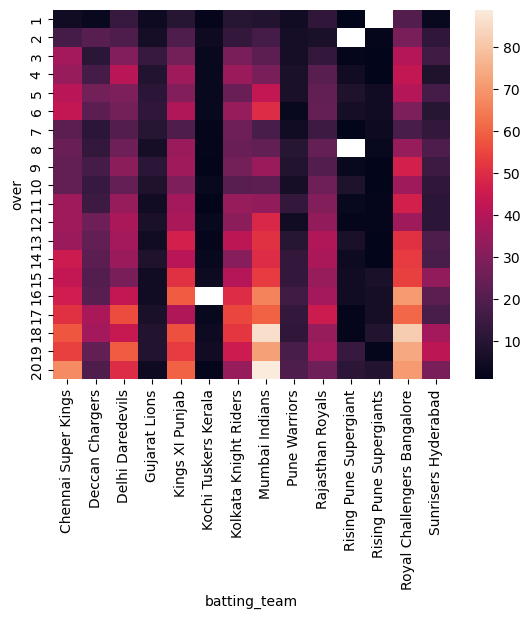

In [165]:
#importing seaborn library to use heatmap
import seaborn as sns
sns.heatmap(x)

In [197]:
#set and reset index
delivery.set_index('over',inplace=True)
#it makes over as indices and removes default indices

KeyError: "None of ['over'] are in the columns"

In [199]:
delivery.head(2)

,inning,batting_team,bowling_team,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
over,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [203]:
delivery.reset_index(inplace=True)
delivery.head(2)
#to undo set  operation

,index,over,inning,batting_team,bowling_team,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [215]:
#handling missing values
# drops null values (rows)
delivery.dropna()

,index,over,inning,batting_team,bowling_team,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,11,2,1,Sunrisers Hyderabad,Royal Challengers Bangalore,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,64,11,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,94,16,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
165,165,7,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,CH Gayle,TM Head,DJ Hooda,0,...,0,0,0,0,0,0,0,CH Gayle,caught,DA Warner
199,199,12,2,Royal Challengers Bangalore,Sunrisers Hyderabad,4,KM Jadhav,TM Head,MC Henriques,0,...,0,0,0,0,1,0,1,KM Jadhav,run out,BCJ Cutting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150402,150402,11,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,CH Gayle,V Kohli,BCJ Cutting,0,...,0,0,0,0,0,0,0,CH Gayle,caught,Bipul Sharma
150422,150422,14,2,Royal Challengers Bangalore,Sunrisers Hyderabad,5,AB de Villiers,KL Rahul,Bipul Sharma,0,...,0,0,0,0,0,0,0,AB de Villiers,caught,MC Henriques
150438,150438,17,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,SR Watson,Sachin Baby,Mustafizur Rahman,0,...,0,0,0,0,0,0,0,SR Watson,caught,MC Henriques
150448,150448,19,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,STR Binny,Sachin Baby,Mustafizur Rahman,0,...,0,0,0,0,1,0,1,STR Binny,run out,DJ Hooda


In [217]:
# to drop columns 
delivery.dropna(axis=1)

,index,over,inning,batting_team,bowling_team,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,150455,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2
150456,150456,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0
150457,150457,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1
150458,150458,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1


In [221]:
delivery.dropna(how='all')
#drops complete row which is empty

,index,over,inning,batting_team,bowling_team,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,150455,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,150456,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,150457,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,150458,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [223]:
delivery.dropna(axis=1,how='all')
#drops complete column which is empty

,index,over,inning,batting_team,bowling_team,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,150455,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,150456,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,150457,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,150458,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [233]:
# delete rows if batting team column is empty
delivery.dropna(subset=['batting_team'])

,index,over,inning,batting_team,bowling_team,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,150455,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,150456,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,150457,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,150458,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [237]:
# delete rows if batting tean or bowling team column is empty
delivery.dropna(subset=['batting_team','bowling_team'])

,index,over,inning,batting_team,bowling_team,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,150455,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,150456,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,150457,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,150458,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [243]:
#fillna
#fills all the missing values with 0
delivery.fillna(0)


,index,over,inning,batting_team,bowling_team,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,0,0,0
3,3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,150455,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,0,0,0
150456,150456,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,150457,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,0,0,0
150458,150458,20,2,Royal Challengers Bangalore,Sunrisers Hyderabad,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,0,0,0


In [251]:
delivery['bowling_team'].fillna('Not specified')
#fills missing values with 'Not specified'

0         Royal Challengers Bangalore
1         Royal Challengers Bangalore
2         Royal Challengers Bangalore
3         Royal Challengers Bangalore
4         Royal Challengers Bangalore
                     ...             
150455            Sunrisers Hyderabad
150456            Sunrisers Hyderabad
150457            Sunrisers Hyderabad
150458            Sunrisers Hyderabad
150459            Sunrisers Hyderabad
Name: bowling_team, Length: 150460, dtype: object

In [255]:
delivery['over'].fillna(1)
#fills over column missing values with 30

0          1
1          1
2          1
3          1
4          1
          ..
150455    20
150456    20
150457    20
150458    20
150459    20
Name: over, Length: 150460, dtype: int64

In [259]:
delivery['over'].fillna(method='bfill')

C:\Users\shiva\AppData\Local\Temp\ipykernel_2420\2059151626.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  delivery['over'].fillna(method='bfill')


0          1
1          1
2          1
3          1
4          1
          ..
150455    20
150456    20
150457    20
150458    20
150459    20
Name: over, Length: 150460, dtype: int64

In [261]:
delivery['over'].fillna(method='ffill')

C:\Users\shiva\AppData\Local\Temp\ipykernel_2420\464699253.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  delivery['over'].fillna(method='ffill')


0          1
1          1
2          1
3          1
4          1
          ..
150455    20
150456    20
150457    20
150458    20
150459    20
Name: over, Length: 150460, dtype: int64